NameError: name 'nine' is not defined

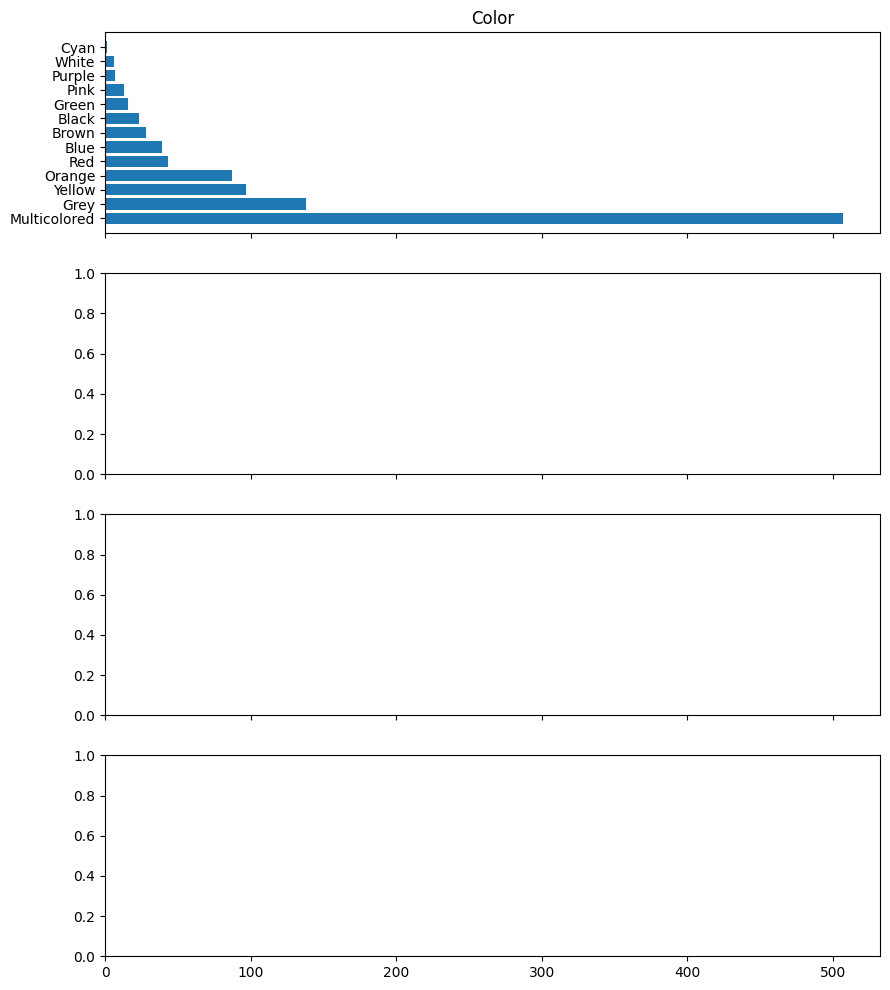

In [ ]:
#%%
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# ─── User parameters ────────────────────────────────────────────────────────
CSV_PATH   = '/home/patrick/ssd/discover-hidden-visual-concepts/PatrickProject/testdata.csv'
ATTRIBUTES = ['Color', 'Size', 'Amount', 'Texture']
# ──────────────────────────────────────────────────────────────────────────────

# 1) Load data
df = pd.read_csv(CSV_PATH)

# 2) Compute counts for each attribute
counts = {attr: df[attr].value_counts() for attr in ATTRIBUTES}

# 3) Create a 4×1 grid of subplots, shared x-axis
fig, axes = plt.subplots(
    nrows=len(ATTRIBUTES), ncols=1,
    figsize=(10, 12), sharex=True
)

for ax, attr in zip(axes, ATTRIBUTES):
    vc = counts[attr]
    # simple horizontal bar chart
    bars = ax.barh(vc.index, vc.values)
    ax.set_title(attr)
    ax.set_ylabel('')

    # annotate counts at end of each bar
    for bar in bars:
        width = bar.get_width()
        ax.text(
            width + max(vc.values)*0.005,   # small offset to the right
            bar.get_y() + bar.get_height()/2,
            f"{int(width)}",
            va='center', ha='left', fontsize= 9
        )

# 4) Global formatting
axes[-1].set_xlabel('# Images')
fig.suptitle('Distribution of Annotations by Attribute', fontsize=16, y=0.95)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()
